# Question 1

In [57]:
import numpy as np
import pandas as pd

student_records = pd.read_csv('student_records.csv') # read csv file

student_records.shape # check the shape of the dataframe

(200, 3)

In [58]:
student_records.head() # check the first 5 rows of the dataframe

,Name,Age,Marks
0,Student1,22,80
1,Student2,20,92
2,Student3,22,51
3,Student4,19,78
4,Student5,23,75


## Sort csv file by Insertion Sort

In [59]:
student_records = student_records.reset_index(drop=True) # reset the index

for i in range(1, len(student_records)): # start from to second row to last row
    key_row = student_records.loc[i].copy() # copy the current row to key
    j = i - 1
    while j >= 0 and student_records.loc[j, 'Marks'] > key_row['Marks']: 
        student_records.loc[j+1] = student_records.loc[j]
        j -= 1
    student_records.loc[j+1] = key_row

student_records.to_csv('sorted_by_insertion_sort.csv', index=False) # save the insertion sorted result 

In [60]:
sorted_by_insertion_sort = pd.read_csv('sorted_by_insertion_sort.csv')
sorted_by_insertion_sort.head() # check the first 5 rows of insertion sorted result

,Name,Age,Marks
0,Student108,20,50
1,Student153,19,50
2,Student195,21,50
3,Student3,22,51
4,Student22,22,51


## Sort csv file by Merge Sort 

In [61]:
student_records = pd.read_csv('student_records.csv').reset_index(drop=True) 
student_records.head() # check the first 5 rows of the dataframe
student_records.shape

(200, 3)

In [62]:
def merge_sort(arr):
    q = len(arr) // 2
    if q < 1:
        return arr
    else:
        left = arr.iloc[:q].copy() # copy the left part of the array
        right = arr.iloc[q:].copy() # copy the right part of the array
        left = merge_sort(left)
        right = merge_sort(right) # recursive call
        merge(arr, left, right) # merge
    return arr 


def merge(arr, left, right):
    i = 0 # left index
    j = 0 # right index
    k = 0 # merged array index
    while i < len(left) and j < len(right):
        if left.iloc[i]['Marks'] <= right.iloc[j]['Marks']: # use iloc to access the 'Marks' column 
            arr.iloc[k] = left.iloc[i]
            i += 1
        else:
            arr.iloc[k] = right.iloc[j]
            j += 1
        k += 1
    while i < len(left):
        arr.iloc[k] = left.iloc[i]
        i += 1
        k += 1
    while j < len(right):
        arr.iloc[k] = right.iloc[j]
        j += 1
        k += 1

merge_sorted = merge_sort(student_records)
merge_sorted.to_csv('sorted_by_merge_sort.csv', index=False)

In [63]:
merge_sorted = pd.read_csv('sorted_by_merge_sort.csv')
merge_sorted.head()

,Name,Age,Marks
0,Student108,20,50
1,Student153,19,50
2,Student195,21,50
3,Student3,22,51
4,Student22,22,51


# Question 2

In [64]:
def selection_sort(arr): 
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

print(selection_sort(np.random.permutation(10)))

[0 1 2 3 4 5 6 7 8 9]


# Question 3

### selection_sort

In [65]:
def selection_sort(arr): 
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def selection_sort_desc(arr):
    for i in range(len(arr)):
        max_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] > arr[max_idx]:
                max_idx = j
        arr[i], arr[max_idx] = arr[max_idx], arr[i]
    return arr

#### insertion_sort

In [66]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        j = i - 1
        key = arr[i]
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

def insertion_sort_desc(arr):
    for i in range(1, len(arr)):
        j = i - 1
        key = arr[i]
        while j >= 0 and key > arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

#### merge sort

In [70]:
def merge_sort(arr):
    # to do
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid].copy()
        R = arr[mid:].copy()
        merge_sort(L)
        merge_sort(R)
        merge(arr, L, R)
    return arr


def merge(arr, L, R):
    i = 0
    j = 0
    k = 0
    while i < len(L) and j < len(R):
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
    while i < len(L):
        arr[k] = L[i]
        i += 1
        k += 1
    while j < len(R):
        arr[k] = R[j]
        j += 1
        k += 1


def merge_sort_desc(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid].copy()
        R = arr[mid:].copy()
        merge_sort_desc(L)
        merge_sort_desc(R)
        merge_desc(arr, L, R)
    return arr


def merge_desc(arr, L, R):
    i = 0
    j = 0
    k = 0
    while i < len(L) and j < len(R):
        if L[i] >= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
    while i < len(L):
        arr[k] = L[i]
        i += 1
        k += 1
    while j < len(R):
        arr[k] = R[j]
        j += 1
        k += 1

#### heap sort

In [68]:
def heapify(arr, n, i):
    """summary

    Args:
        arr (list[int]): list of integers
        n (int): heap size
        i (int): index of root
    """
    largest = i
    l = Left(i)
    r = Right(i)
    if l < n and arr[l] > arr[i]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def Parent(i):
    return (i-1)//2 

def Left(i):
    return 2*i + 1

def Right(i):
    return 2*i + 2

def build_max_heap(arr,n):
    for i in range(n//2, -1, -1):
        heapify(arr, n, i)

def heap_sort(arr,n):
    build_max_heap(arr,n)
    for i in range(n,1,-1):
        arr[0], arr[i-1] = arr[i-1], arr[0]
        n = n - 1
        heapify(arr, n, 0)
        
def heapify_min(arr, n, i):
    smallest = i
    l = Left(i)
    r = Right(i)
    
    if l<n and r<n and arr[l] < arr[r]:
        child = l
    else :
        child = r
    
    if child < n and arr[i] > arr[child]:
        smallest = child
    
    if smallest != i:
        arr[i], arr[smallest] = arr[smallest], arr[i]
        heapify_min(arr, n, smallest)

def build_min_heap(arr,n):
    for i in range(n//2-1, -1, -1):
        heapify_min(arr, n, i)

def heap_sort_desc(arr,n):
    build_min_heap(arr,n)
    for i in range(n,1,-1):
        arr[0], arr[i-1] = arr[i-1], arr[0]
        n = n-1
        heapify_min(arr,n,0)

[0 1 2 3 4 5 6 7 8 9]


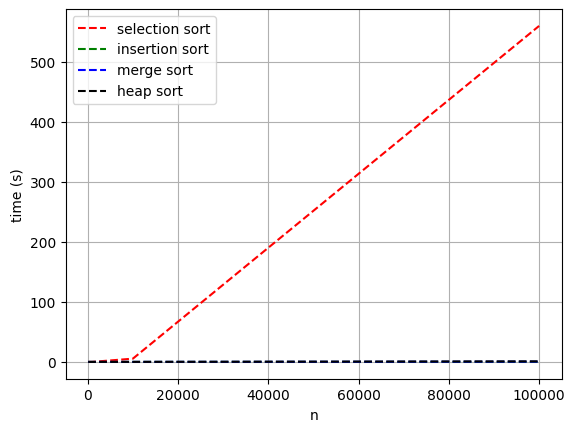

In [92]:
import matplotlib.pyplot as plt
import time 

n = int(input("size of the integer array :"))

arr = np.random.permutation(n) # use permutation to generate a random, unique array

choice = input(f"Enter the choice of sorting algorithm(selection, insertion, merge, heap): ")
order = input(f"Enter the order of sorting(ascending, descending): ")

if order == 'ascending':    
    if choice == 'selection':
        selection_sort(arr)
    elif choice == 'insertion':
        insertion_sort(arr)
    elif choice == 'merge':
        merge_sort(arr)
    elif choice == 'heap':
        heap_sort(arr,len(arr))
        
elif order == 'descending':
    if choice == 'selection':
        selection_sort_desc(arr)
    elif choice == 'insertion':
        insertion_sort_desc(arr)
    elif choice == 'merge':
        merge_sort_desc(arr)
    elif choice == 'heap':
        heap_sort_desc(arr,len(arr))

print(arr)

optional = input(f"do you want to see time analysis for all sorting algorithms? (y/n?)")

if optional == 'y':
    times = [100,1000,10000,100000]
    selection_sort_time = []
    insertion_sort_time = []
    merge_sort_time = []
    heap_sort_time = []

    for i in times:
        arr = np.random.permutation(i)
        start_time = time.time()
        selection_sort(arr)
        end_time = time.time()
        selection_sort_time.append(end_time - start_time)
        
        start_time = time.time()
        insertion_sort(arr)
        end_time = time.time()
        insertion_sort_time.append(end_time - start_time)
        
        start_time = time.time()
        merge_sort(arr)
        end_time = time.time()
        merge_sort_time.append(end_time - start_time)
        
        start_time = time.time()
        heap_sort(arr,len(arr))
        end_time = time.time()
        heap_sort_time.append(end_time - start_time)

    plt.figure()
    plt.plot(times, selection_sort_time, linestyle='--', color='r', label='selection sort')
    plt.plot(times, insertion_sort_time, linestyle='--', color='g', label='insertion sort')
    plt.plot(times, merge_sort_time, linestyle='--', color='b', label='merge sort')
    plt.plot(times, heap_sort_time, linestyle='--', color='k', label='heap sort')
    plt.xlabel('n')
    plt.ylabel('time (s)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
print(selection_sort_time)
print(insertion_sort_time)
print(merge_sort_time)
print(heap_sort_time)


[0.0012969970703125, 0.07237911224365234, 5.439007997512817, 559.52197098732]
[4.029273986816406e-05, 0.00019884109497070312, 0.0020389556884765625, 0.02210402488708496]
[0.0006108283996582031, 0.0027740001678466797, 0.03487801551818848, 0.43250417709350586]
[0.0008678436279296875, 0.0053081512451171875, 0.07344174385070801, 0.9613518714904785]
